In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np


In [2]:
# load data
train_set = pd.read_csv('train.csv')

test_set = pd.read_csv('test.csv')

print('Train Set\n', train_set.shape, '\n', train_set.isnull().sum())
print('Test Set\n', test_set.shape, '\n', test_set.isnull().sum())
all_set = pd.concat([train_set, test_set])


Train Set
 (15035, 21) 
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Test Set
 (6468, 20) 
 id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [3]:
train_set.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [4]:
test_set.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
# check if there is any null values
print(all_set.isnull().sum(), '\n -----------data types------------\n',all_set.dtypes)

bathrooms           0
bedrooms            0
condition           0
date                0
floors              0
grade               0
id                  0
lat                 0
long                0
price            6468
sqft_above          0
sqft_basement       0
sqft_living         0
sqft_living15       0
sqft_lot            0
sqft_lot15          0
view                0
waterfront          0
yr_built            0
yr_renovated        0
zipcode             0
dtype: int64 
 -----------data types------------
 bathrooms        float64
bedrooms           int64
condition          int64
date              object
floors           float64
grade              int64
id                 int64
lat              float64
long             float64
price            float64
sqft_above         int64
sqft_basement      int64
sqft_living        int64
sqft_living15      int64
sqft_lot           int64
sqft_lot15         int64
view               int64
waterfront         int64
yr_built           int64
yr_renovated 

In [6]:
# slice date column to extract year and month
all_set.date= all_set.date.str.slice(0, 6).astype('int')
all_set[all_set['price']>0].corr(method='pearson')['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702899
grade            0.667211
sqft_above       0.608577
sqft_living15    0.586419
bathrooms        0.525479
view             0.400806
bedrooms         0.323672
sqft_basement    0.322218
lat              0.301604
waterfront       0.265738
floors           0.262588
yr_renovated     0.140808
sqft_lot         0.096793
sqft_lot15       0.086384
yr_built         0.047290
condition        0.039740
long             0.023547
id               0.020899
date             0.007717
zipcode         -0.051498
Name: price, dtype: float64

mu:  540682.6531426671  std:  371524.6603903912


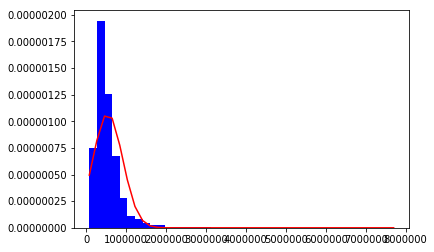

In [7]:
# Normalize target variable
mu = train_set.price.mean()
std = train_set.price.std()
print('mu: ', mu, ' std: ',std)

n, bins, patches = plt.hist(train_set.price, 40, density=1, facecolor='blue')

y = scipy.stats.norm.pdf(bins, mu, std)
plt.plot(bins, y, 'r-')
plt.show()

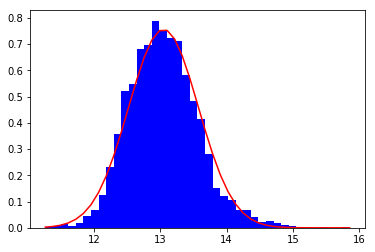

In [8]:
price_log = np.log(train_set.price)
price_log_mu = np.mean(price_log)
price_log_std = np.std(price_log)

n, bins, patches = plt.hist(price_log, 40, density=2, facecolor='blue')

y= scipy.stats.norm.pdf(bins, price_log_mu, price_log_std)
plt.plot(bins, y, 'r-')
plt.show()


In [9]:
# replacing train_set.price with log-transformed price
original_price = train_set.price.copy()
train_set.price = price_log
train_set.corr(method='pearson').price.sort_values(ascending=False)

price            1.000000
grade            0.707412
sqft_living      0.697907
sqft_living15    0.621800
sqft_above       0.607197
bathrooms        0.552000
lat              0.444417
bedrooms         0.359946
view             0.347505
floors           0.317810
sqft_basement    0.314378
waterfront       0.172580
yr_renovated     0.127533
sqft_lot         0.108946
sqft_lot15       0.096976
yr_built         0.076294
long             0.054362
condition        0.042947
id               0.035940
zipcode         -0.039195
Name: price, dtype: float64

In [10]:
# sqft_living = sqft_above + sqft_basement
# new feature 'with_basement'

all_set['with_basement'] = np.select([all_set['sqft_basement'] > 0], [1], default=0)
all_set['with_basement'].value_counts()

0    13056
1     8447
Name: with_basement, dtype: int64

In [11]:
# drop sqft_above and sqft_basement
all_set.drop(['sqft_above', 'sqft_basement'], axis=1, inplace=True)

In [12]:
# Divide date into 5 groups
all_set.groupby('date').agg('count')

conditions = [all_set['date'] <=201406,
             (all_set['date'] > 201406) & (all_set['date'] <= 201408),
             (all_set['date'] > 201408) & (all_set['date'] <= 201410),
             (all_set['date'] > 201410) & (all_set['date'] <= 201412),
             (all_set['date'] > 201412) & (all_set['date'] <= 201502)]
choices = [1, 2, 3, 4, 5]

all_set['date_label'] = np.select(conditions, choices, default = 6)
all_set.drop('date', axis=1, inplace=True)
all_set.date_label.value_counts()

6    4690
2    4148
1    3948
3    3647
4    2867
5    2203
Name: date_label, dtype: int64

In [13]:
# add feature (renovated)
all_set['renovated'] = np.select([all_set['yr_renovated'] > 0], [1], default=0)
all_set.drop('yr_renovated', axis=1, inplace=True)
all_set['renovated'].value_counts()

0    20590
1      913
Name: renovated, dtype: int64

In [14]:
# add feature (living_greater) after comparing sqft_living and sqft_living15
all_set['living_greater'] = np.select([all_set['sqft_living'] >= all_set['sqft_living15']], [1], default=0)
all_set.drop('sqft_living15', axis=1, inplace=True)
all_set['living_greater'].value_counts()

1    12352
0     9151
Name: living_greater, dtype: int64

In [15]:
# add feature (lot_greater) after comparing sqft_lot and sqft_lot15
all_set['lot_greater'] = np.select([all_set['sqft_lot'] >= all_set['sqft_lot15']], [1], default=0)
all_set.drop('sqft_lot15', axis=1, inplace=True)
all_set['lot_greater'].value_counts()

1    13006
0     8497
Name: lot_greater, dtype: int64

In [16]:
# Train set and Test set
train_set = all_set.iloc[:len(train_set),:]
test_set = all_set.iloc[len(train_set):, :]

print("Train set:", train_set.shape, "\n Test set:", test_set.shape)

Train set: (15035, 20) 
 Test set: (6468, 20)


In [17]:
# Multiple Regression
import statsmodels.api as sm
y = train_set.price.copy()
x = train_set.drop(['id', 'price'], axis=1)
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions = model.predict(x)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     1989.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:18:10   Log-Likelihood:            -2.0500e+05
No. Observations:               15035   AIC:                         4.100e+05
Df Residuals:                   15016   BIC:                         4.102e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.299e+06   3.53e+06      0.935      0.350   -3.62e+06    1.02e+07
bathrooms       3.996e+04   3973.605     10.056      0.000    3.22e+04    4.77e+04
bedrooms       -3.579e+04   2401.902    -14.900      0.000   -4.05e+04   -3.11e+04
condition       2.927e+04   2855.814     10.248      0.000    2.37e+04    3.49e+04
floors          1.977e+04   4225.484      4.679      0.000    1.15e+04    2.81e+04
grade           9.431e+04   2473.233     38.133      0.000    8.95e+04    9.92e+04
lat             5.905e+05    1.3e+04     45.580      0.000    5.65e+05    6.16e+05
long           -2.247e+05   1.56e+04    -14.442      0.000   -2.55e+05   -1.94e+05
sqft_living      204.7257      3.942     51.930      0.000     196.998     212.453
sqft_lot          -0.0531      0.041     -1.303      0.193      -0.133       0.027
view             5.45e+04   2530.462     21.538      0.000    4.95e+04    5.95e+04
waterfront      5.684e+05   2.14e+04     26.560      0.000    5.26e+05     6.1e+05
yr_built       -2550.5531     87.924    -29.009      0.000   -2722.895   -2378.211
zipcode         -555.9095     39.829    -13.957      0.000    -633.979    -477.840
with_basement  -1.092e+04   4084.281     -2.675      0.007   -1.89e+04   -2917.786
date_label      6665.3500    918.142      7.260      0.000    4865.679    8465.021
renovated       4.817e+04   8812.911      5.466      0.000    3.09e+04    6.54e+04
living_greater -6.423e+04   3933.108    -16.332      0.000   -7.19e+04   -5.65e+04
lot_greater     7971.6907   3436.508      2.320      0.020    1235.716    1.47e+04
==============================================================================
Omnibus:                    13098.412   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1463105.648
Skew:                           3.675   Prob(JB):                         0.00
Kurtosis:                      50.765   Cond. No.                     2.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Drop sqrt_lot field 
all_set.drop('sqft_lot', axis=1, inplace=True)

train_set.corr(method='pearson').price.sort_values(ascending=False)

price             1.000000
sqft_living       0.702899
grade             0.667211
bathrooms         0.525479
view              0.400806
bedrooms          0.323672
lat               0.301604
waterfront        0.265738
floors            0.262588
living_greater    0.188061
with_basement     0.176706
renovated         0.140550
sqft_lot          0.096793
yr_built          0.047290
condition         0.039740
lot_greater       0.033759
long              0.023547
id                0.020899
date_label        0.002187
zipcode          -0.051498
Name: price, dtype: float64

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


x = np.array(train_set.drop(['id', 'price'], axis=1))
y = np.array(train_set.price.values, dtype='int64')

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred))


C:\Users\donny\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.0039906883937479215


In [20]:
rd_forest = RandomForestClassifier(n_estimators=300)
rd_forest.fit(x_train, y_train)
y_pred = rd_forest.predict(x_test)
metrics.accuracy_score(y_test, y_pred)


MemoryError: 

In [ ]:
y_train = train_set.price
price = test_set.id
x_train = train_set.drop(['id', 'price'], axis=1).copy()
x_test = test_set.drop(['id'], axis=1).copy()

In [ ]:
'''
# SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) *100, 2)
'''

In [ ]:
# Decision Tree
dec_tree = DecisionTreeClassifier(criterion='entropy', random_state = 0)
dec_tree.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc_dec = round(dec_tree.score(x_train, y_train)*100, 2)`


In [ ]:
# Random Forest
rd_forest = RandomForestClassifier(n_estimators=300)
rd_forest.fit(x_train, y_train)
y_pred = rd_forest.predict(x_test)
acc_rd_forest = round(rd_forest.score(x_train, y_train)*100, 2)